<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/ML_Lab8_J078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Lab 8**
##**Roll no: J078**

###Indian elephants, african elephants and tuskers

In [1]:
#code part 1 -Obtaining the Dataset
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")# Indian Elephants synset
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")# African Elephants synset
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
t_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")# Tuskers synset
print(t_page.content)
t_soup = BeautifulSoup(t_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm3.static.flickr.com/2394/2235169574_a573a0a0e1.jpg\r\nhttp://www.kohchang.se/elephanttrekking/elephas-maximus.jpg\r\nhttp://static.flickr.com/166/430524556_8d625a0c53.jpg\r\nhttp://farm1.static.flickr.com/34/65351417_9be3421342.jpg\r\nhttp://www.clementfrancis.com/mammalimages/elephant1_tn.jpg\r\nhttp://static.flickr.com/7/10556049_dbbb080a01.jpg\r\nhttp://content.answers.com/main/content/wp/en-commons/thumb/1/19/200px-Borneo-elephant-PLoS_Biology.jpg\r\nhttp://farm1.static.flickr.com/166/413202515_d7db2babf4.jpg\r\nhttp://farm1.static.flickr.com/36/117884234_911615dd80.jpg\r\nhttp://farm2.static.flickr.com/1345/1410282114_6cb715cd27.jpg\r\nhttp://beta.wwf.it/UserFiles/Image/wwfcanon/_animali/58714.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Lightmatter_elephanttrunk.jpg/220px-Lightmatter_elephanttrunk.jpg\r\nhttp://static.flickr.com/98/385373846_76b82f230f.jpg\r\nhttp://farm1.static.flickr.com/118/297995324_906a19a127.jpg\r\nhttp://farm1.static.flickr.

In [2]:
#code part 2- Using Beautiful Soup to get the correct Outcome

ie_str_soup=str(ie_soup)#convert soup to string so it can be split
type(ie_str_soup)
ie_split_urls=ie_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ie_split_urls))#print the length of the list so you know how many urls you have

ae_str_soup=str(ae_soup)#convert soup to string so it can be split
type(ae_str_soup)
ae_split_urls=ae_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ae_split_urls))

t_str_soup=str(t_soup)#convert soup to string so it can be split
type(t_str_soup)
t_split_urls=t_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(t_split_urls))#print the length of the list so you know how many urls you have

1650
2278
1065


In [3]:
#Creating Dataframe 
#ieaet-Indian Elephant,African Elephant,Tuskers
!mkdir /content/ieaet_train/ 
!mkdir /content/ieaet_test/ 

mkdir: cannot create directory ‘/content/ieaet_train/’: File exists
mkdir: cannot create directory ‘/content/ieaet_test/’: File exists


In [4]:
#Defining function to convert URL to images 
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [5]:
n_of_training_images=50   #The number of training images to use
counter=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ieaet_train/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)
      except:
        None
print("\n ALL THE INDIAN ELEPEHANT IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

counter=0
for progress in range(10*n_of_training_images):#store all 200 AFRICAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break 
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ieaet_train/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)

      except:
        None
print("\n ALL THE AFRICAN ELEPEHANT IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

counter=0
for progress in range(10*n_of_training_images):#store all the 200 TUSKER images on a directory
    if (counter == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not t_split_urls[progress] == None:
      try:
        I = url_to_image(t_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ieaet_train/t.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)
      except:
        None 
print("\n ALL THE TUSKERS IMAGES STORED ON THE DIRECTORY\n")      
print("Total Counter :" ,counter)

0
Counter count : 1
Counter count : 2
Counter count : 3
Counter count : 4
Counter count : 5
Counter count : 6
Counter count : 7
10
Counter count : 8
Counter count : 9
Counter count : 10
Counter count : 11
Counter count : 12
20
Counter count : 13
Counter count : 14
Counter count : 15
30
Counter count : 16
Counter count : 17
Counter count : 18
40
Counter count : 19
Counter count : 20
Counter count : 21
Counter count : 22
Counter count : 23
Counter count : 24
50
Counter count : 25
Counter count : 26
Counter count : 27
Counter count : 28
Counter count : 29
60
Counter count : 30
Counter count : 31
Counter count : 32
Counter count : 33
70
Counter count : 34
Counter count : 35
Counter count : 36
Counter count : 37
Counter count : 38
Counter count : 39
Counter count : 40
80
Counter count : 41
Counter count : 42
Counter count : 43
Counter count : 44
Counter count : 45
90
Counter count : 46
Counter count : 47
Counter count : 48
Counter count : 49
Counter count : 50

 ALL THE INDIAN ELEPEHANT IMA

In [6]:
#Storing Test Data data:
n_of_testing_images=15
counter=0
for progress in range(10*n_of_testing_images):#store all the 50INDIAN ELEPHANT TEST IMAGES on a directory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ieaet_test/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE INDIAN ELEPEHANT TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

counter=0
for progress in range(10*n_of_testing_images):#store all 50 AFRICAN ELEPEHANT TEST IMAGES on a driectory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ieaet_test/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE AFRCIAN ELEPEHANT TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

counter=0
for progress in range(10*n_of_testing_images):#store all the 50 TUSKER TEST IMAGES on a directory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not t_split_urls[progress] == None:
      try:
        I = url_to_image(t_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ieaet_test/t.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)

      except:
        None
print("\n ALL THE TUSKER TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

0
Counter count:  1
Counter count:  2
Counter count:  3
Counter count:  4
Counter count:  5
10
Counter count:  6
Counter count:  7
Counter count:  8
Counter count:  9
20
Counter count:  10
Counter count:  11
Counter count:  12
Counter count:  13
Counter count:  14
Counter count:  15

 ALL THE INDIAN ELEPEHANT TEST IMAGES STORED ON THE DIRECTORY

Total Count:  15
0
Counter count:  1
Counter count:  2
Counter count:  3
Counter count:  4
Counter count:  5
Counter count:  6
10
Counter count:  7
Counter count:  8
Counter count:  9
Counter count:  10
Counter count:  11
Counter count:  12
Counter count:  13
Counter count:  14
20
Counter count:  15

 ALL THE AFRCIAN ELEPEHANT TEST IMAGES STORED ON THE DIRECTORY

Total Count:  15
0
Counter count:  1
Counter count:  2
Counter count:  3
Counter count:  4
10
Counter count:  5
Counter count:  6
Counter count:  7
Counter count:  8
Counter count:  9
Counter count:  10
20
Counter count:  11
Counter count:  12
Counter count:  13
Counter count:  14
Coun

#Save Train images to folder

In [7]:
# Path to the train folder
import os
original_train = '/content/ieaet_train/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append('0')
  elif category == 'ae':
    categories.append('1')
  else:
    categories.append('2')

#Create dataframe for train 

In [8]:
import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})
data.to_csv("original_ieaet_train.csv",index=False)

#Similarly for test 

In [9]:
# Path to the train folder
import os
original_test = '/content/ieaet_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append('0')
  elif category == 'ae':
    categories.append('1')
  else:
    categories.append('2')

data_test = pd.DataFrame({'filename':filenames,'label':categories})
data_test.to_csv("original_ieaet_test.csv",index=False)

In [13]:
#Data Generator 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=.2, 
        height_shift_range=.2,
        fill_mode='nearest',
        rotation_range=90,
        validation_split=0.3)

train_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='training',
                                             shuffle=True,
                                             seed=7,
                                             color_mode='rgb')
 
validation_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='validation',
                                             shuffle=True,
                                             seed=7,color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/ieaet_test/",
                                                x_col="filename",
                                                y_col=None,
                                                batch_size=10,
                                                seed=7,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(150,150),
                                                color_mode='rgb')

Found 75 validated image filenames belonging to 3 classes.
Found 75 validated image filenames belonging to 3 classes.
Found 64 validated image filenames.


#Model building

In [14]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

initializer = keras.initializers.glorot_normal()

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)

callbacks_list = [checkpoint, es]

'\nmodel = Sequential()\nmodel.add(Conv2D(512, (150, 150), padding="valid", activation="relu", input_shape=(150, 150, 3),kernel_initializer=initializer, bias_initializer=initializer))\nmodel.add(Flatten())\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(512,activation="relu",kernel_initializer=initializer, bias_initializer=initializer))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(128,activation="relu",kernel_initializer=initializer, bias_initializer=initializer))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(64,activation="relu",kernel_initializer=initializer, bias_initializer=initializer))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(3,activation=\'softmax\', kernel_initializer=initializer, bias_initializer=initializer))\nmodel.add(layers.Dropout(0.5))\nmodel.summary()\n'

In [15]:
#Building the Sequential Model
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
#We need to use a Conv2D layer at start of the neural network for Images
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="sigmoid", input_shape=X_train.shape[1:])
#the we add a flatten layer
model = Sequential()
# 1st Convolution
model.add(Conv2D(32 , (5 , 5) , padding = "same" , input_shape = (150 , 150 , 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64 , (5 , 5) , padding = "same",activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128 , (5 , 5) , padding = "same",activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.5))

# Flattening to run the model
model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#As it has 4 classes so last layer has 4 units
model.add(Dense(3 , activation="softmax"))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history=model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30,callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 3.3302 - accuracy: 0.2923
Epoch 00001: val_accuracy improved from -inf to 0.35714, saving model to weights-improvement-01-0.36.hdf5
7/7 [==============================] - 3s 433ms/step - loss: 3.3302 - accuracy: 0.2923 - val_loss: 2.6995 - val_accuracy: 0.3571
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 2.4902 - accuracy: 0.3538
Epoch 00002: val_accuracy did not improve from 0.35714
7/7 [==============================] - 1s 204ms/step - loss: 2.4902 - accuracy: 0.3538 - val_loss: 3.1109 - val_accuracy: 0.3429
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 2.0118 - accuracy: 0.4769
Epoch 00003: val_accuracy improved from 0.35714 to 0.45714, saving model to weights-improvement-03-0.46.hdf5
7/7 [==============================] - 3s 443ms/step - loss: 2.0118 - accuracy: 0.4769 - val_loss: 1.4097 - val_accuracy

#Evaluate the model

In [18]:
#Building the Sequential Model
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
#We need to use a Conv2D layer at start of the neural network for Images
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="sigmoid", input_shape=X_train.shape[1:])
#the we add a flatten layer
model1 = Sequential()
# 1st Convolution
model1.add(Conv2D(32 , (5 , 5) , padding = "same" , input_shape = (150 , 150 , 3),activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2 , 2)))
model1.add(Dropout(0.25))

# 2nd Convolution layer
model1.add(Conv2D(64 , (5 , 5) , padding = "same",activation="relu"))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size = (2 , 2)))
model1.add(Dropout(0.25))

# 3rd Convolution layer
model1.add(Conv2D(128 , (5 , 5) , padding = "same",activation="relu"))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size = (2 , 2)))
model1.add(Dropout(0.5))

# Flattening to run the model
model1.add(Flatten())

model1.add(Dense(1024,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))

#As it has 3 classes so last layer has 3 units
model1.add(Dense(3 , activation="softmax"))

In [19]:
#Using callback to load weights of Train model in the test model 
model1.load_weights("/content/weights-improvement-03-0.46.hdf5")
#This depends on storage and jo saved hua hai...so sometimes u need to rename it and chose max accuracy wala only
model1.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.evaluate_generator(generator=validation_generator,steps=STEP_SIZE_TEST)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[1.382042407989502, 0.30000001192092896]

Plot of accuracy of Train & Validation

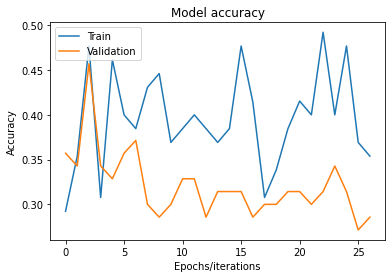

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

Plot of Loss of Train & Validation

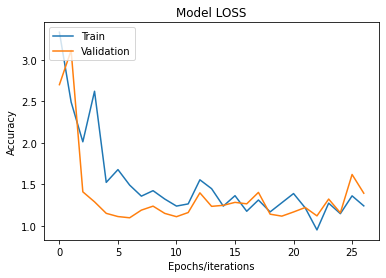

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

#Predict the output

In [22]:
model1.evaluate_generator(generator=validation_generator,steps=STEP_SIZE_TEST)

[1.731198787689209, 0.38333332538604736]

In [23]:
#Only to use when putiing y_col in Test Genenrator
"""
model1.evaluate(test_generator,steps=STEP_SIZE_TEST)

test_generator.reset()

pred=model1.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
"""

6/6 [==============================] - 0s 40ms/step


In [24]:
#assigning label names to the corresponding indexes
labels = {0: 'Indian Elephant', 1: 'African Elephant', 2: 'Tuskers'}

In [25]:
#import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [26]:
#loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
Filename=[]
PREDICTION=pd.DataFrame()
count = 0
for i in os.listdir('/content/ieaet_test'):
  #for item in os.listdir(os.path.join('/content/ieaet_test',i)):
    #code to open the image
    img= PIL.Image.open(os.path.join('/content/ieaet_test',i))
    #resizing the image to (150,)
    img = img.resize((150,150))
    #appending image to the image list
    image.append(img)
    #converting image to array
    img = np.asarray(img, dtype= np.float32)
    #normalizing the image
    img = img / 255
    #reshaping the image in to a 4D array
    img = img.reshape(-1,150,150,3)
    #making prediction of the model
    predict = model1.predict(img)
    #getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    #appending the predicted class to the list
    prediction.append(labels[predict])
    Filename.append(i)

#To check whether the file name getting tested are correct or not
FILE = pd.DataFrame() 
FILE['filename']  = Filename
FILE['label']  = prediction

FILE.head()

,filename,label
0,ie.24.jpg,African Elephant
1,ie.11.jpg,Indian Elephant
2,t.6.jpg,Tuskers
3,ae.0.jpg,Tuskers
4,ae.7.jpg,Indian Elephant


In [27]:
#To get convert to label Format
FILE["label"].replace({"Indian Elephant": "0", "African Elephant": "1","Tuskers": "2"}, inplace=True)
FILE.head()

,filename,label
0,ie.24.jpg,1
1,ie.11.jpg,0
2,t.6.jpg,2
3,ae.0.jpg,2
4,ae.7.jpg,0


Getting the test accuracy by checking on labels


In [28]:
score = accuracy_score(FILE['label'],data_test["label"])
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.296875


Visualizing the results


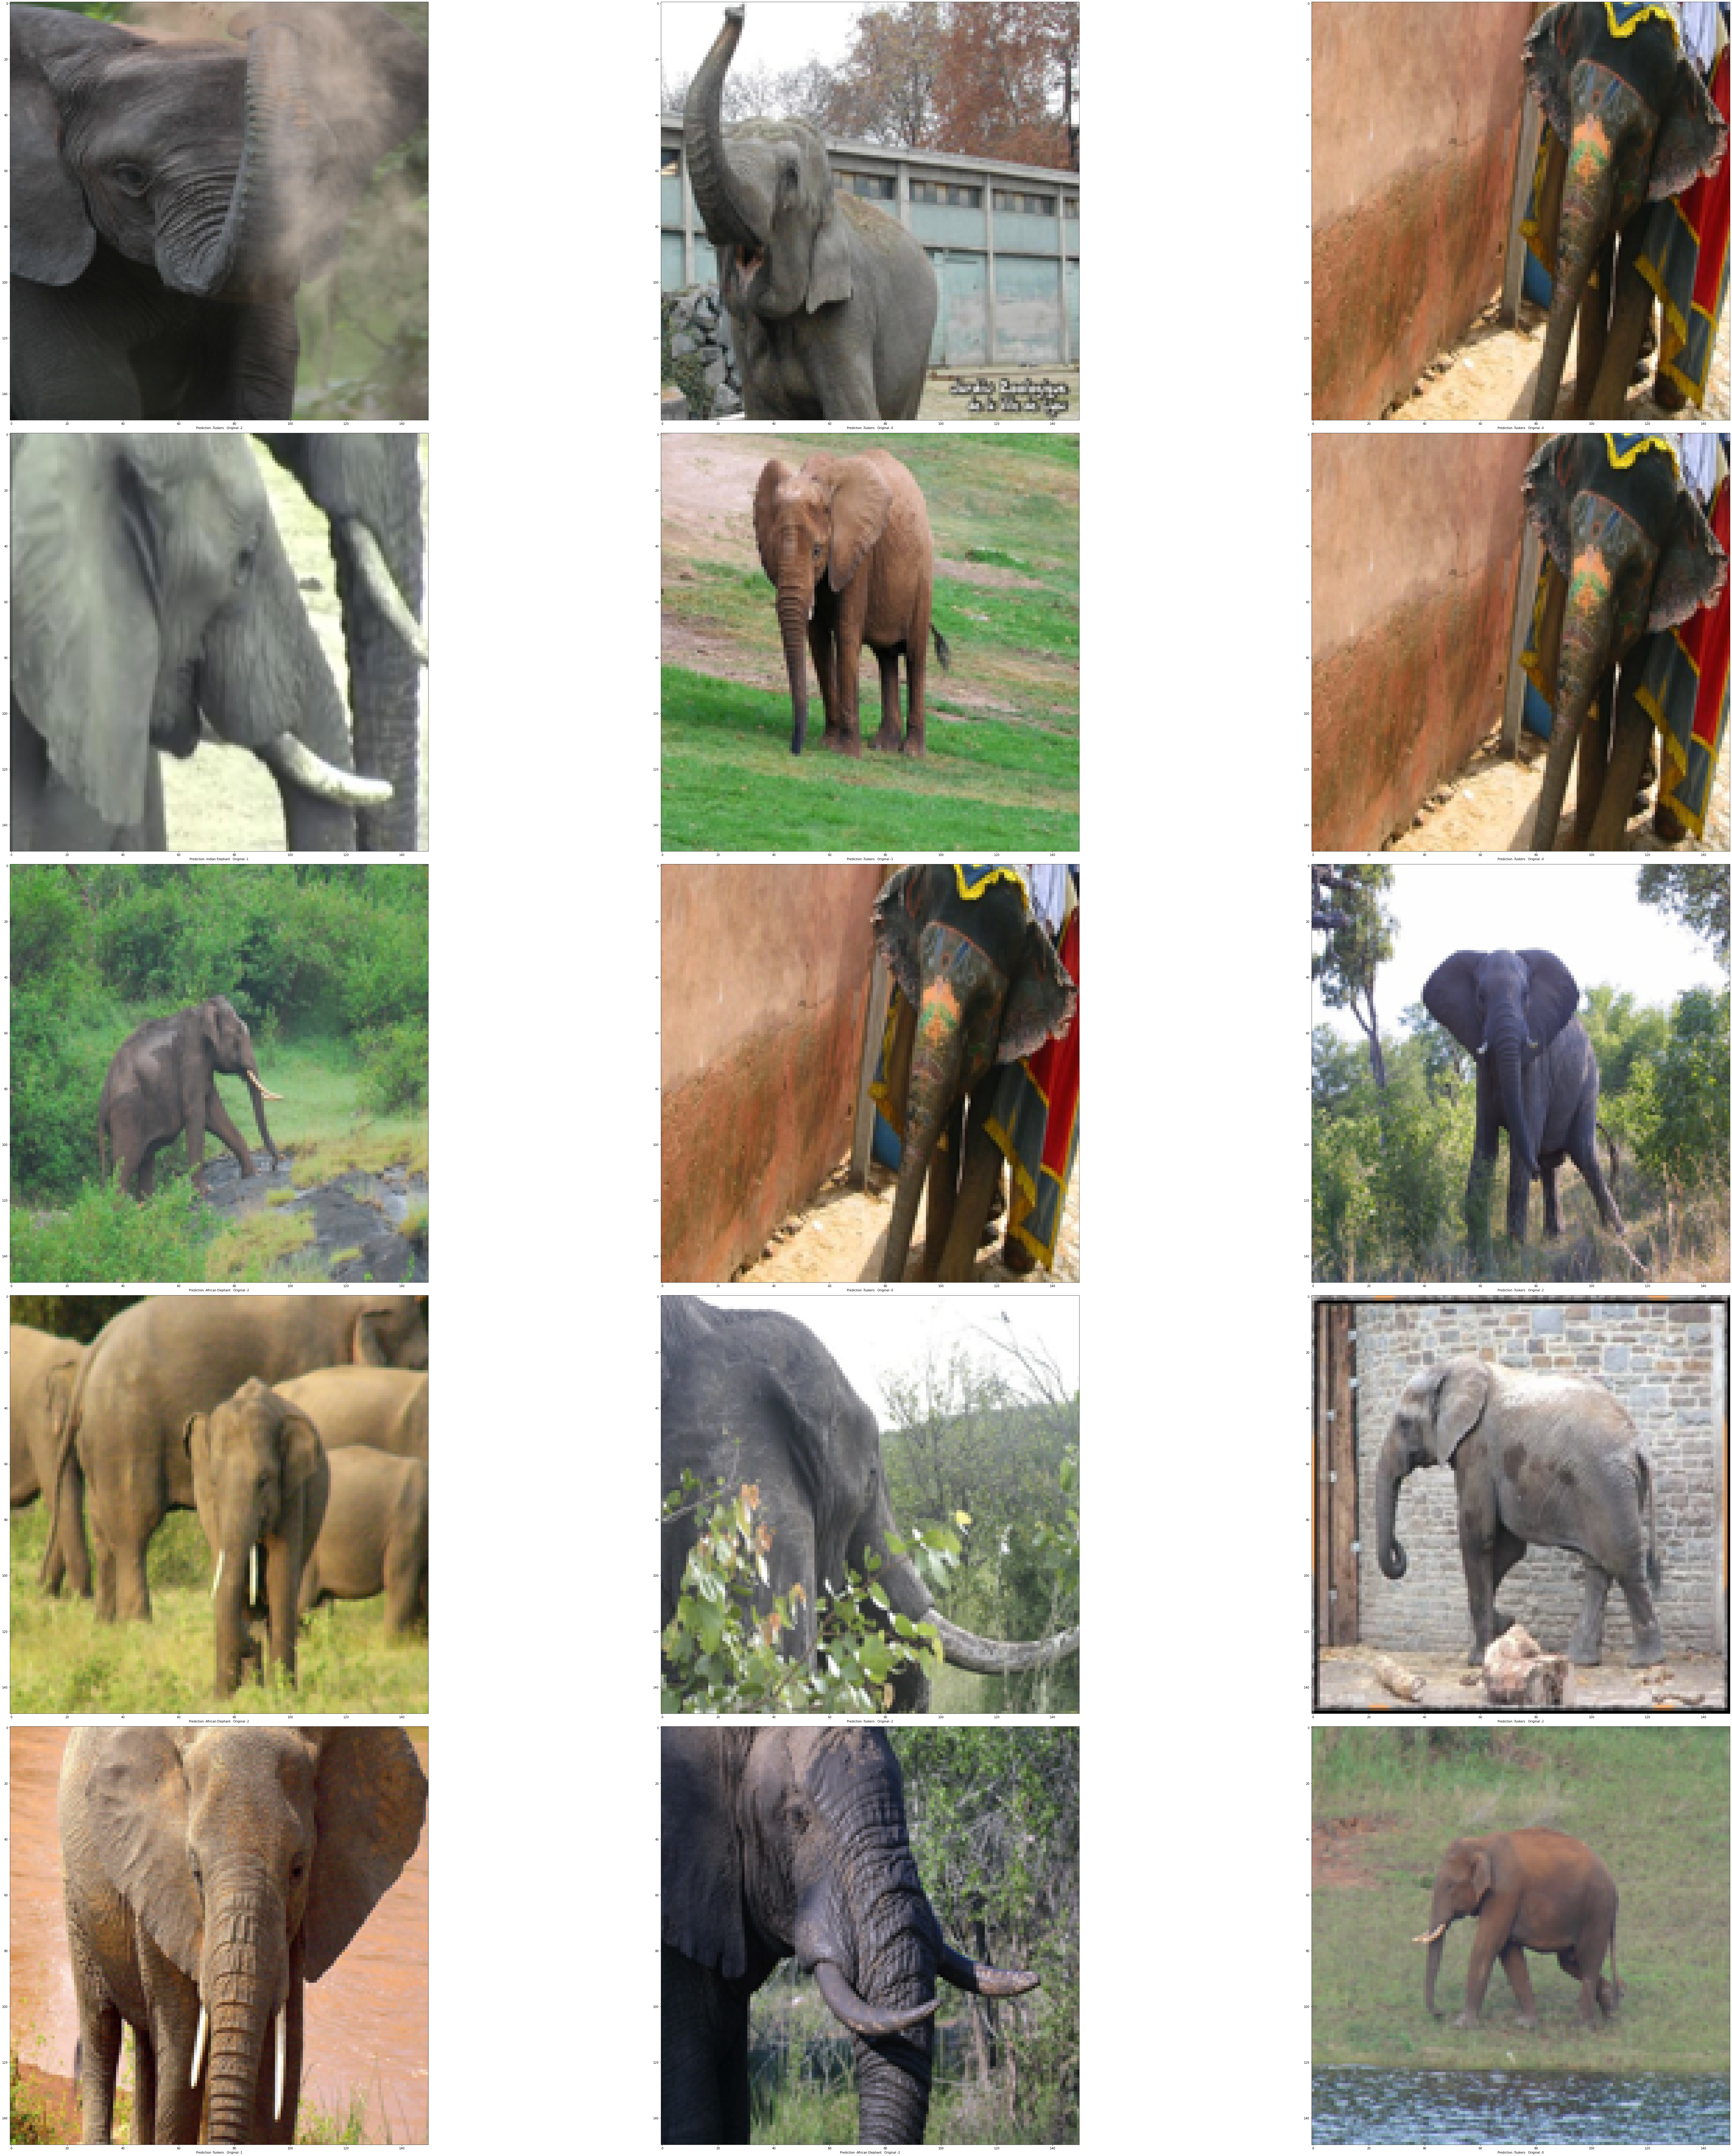

In [29]:
import random
fig=plt.figure(figsize = (100,100))
for i in range(15):
    j = random.randint(0,len(image))
    fig.add_subplot(5,3,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + data_test['label'].iloc[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

Classification report


In [30]:
print(classification_report(np.asarray(data_test['label']), FILE["label"]))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31        21
           1       0.30      0.14      0.19        21
           2       0.28      0.45      0.34        22

    accuracy                           0.30        64
   macro avg       0.30      0.29      0.28        64
weighted avg       0.30      0.30      0.28        64



Plotting confusion matrix for error analysis

Text(0.5, 1.0, 'Confusion_matrix')

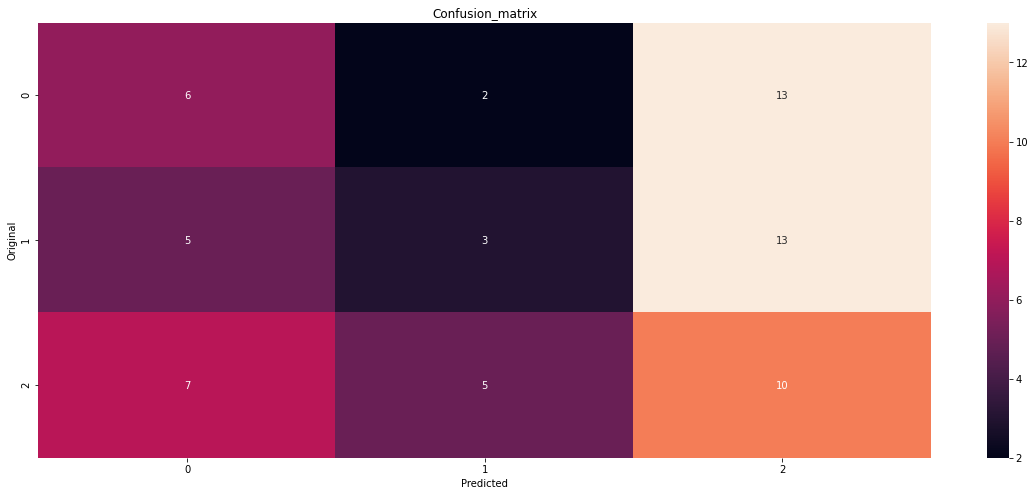

In [31]:
plt.figure(figsize=(20,8))
cm = confusion_matrix(np.asarray(data_test['label']), FILE['label'])
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


#Measure the performance on validation set

In [32]:
from sklearn.metrics import roc_auc_score

# AUC for prediction on validation sample
X_val_sample, val_labels = next(validation_generator)
val_pred = model.predict_proba(X_val_sample)
val_pred = np.reshape(val_pred, val_labels.shape)
val_score_auc = roc_auc_score(val_labels, val_pred)
print ("AUC validation score: ",val_score_auc)

Instructions for updating:
Please use `model.predict()` instead.
AUC validation score:  0.6458333333333334


**Callback is used here to save the improved model.**

Hyper-Parameter used here are:


1) Made 1st Conv2D Layer(5*5) of Relu Activation and the input dimension = (150,150,3 3 and Input units=32,padding='same'.

Similarly made 2 more Conv2d layers of 64 and 128 units keeping matrix,padding and activation the same/ 

2) Have also added Batch Normalization also

3)4) Have flatten the model after using Conv2d Images.Have added DenseLayer of 1024 units with Relu Activation

4)Added Last Layer of Softmax that is also the output layer and 3 classes(Indian Elelphant, African Elephant,Tuskers so choose 3 as next layer shape.

5)Optimizer used:Adam for faster convergence.

6)Metrics: Accuracy to find accuray atlast.

7)loss='categorical_crossentropy' as it has 3 different classes

8)Have splited in 50:20:30 model of Train:Validation:Test

9)Callbackused are: earlystopping, modelcheckpoint.

10)Epoch=50